In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
data_df = pd.read_csv("news_ling_features.csv")

In [3]:
data_df.head()

,text,Polarity,t_syll3,a_char_pw,simp_adj_var,simp_adv_var,simp_intj_var,simp_noun_var,simp_num_var,simp_pron_var,...,a_punct_pw,a_sconj_pw,a_sym_pw,a_verb_pw,a_space_pw,a_intj_ps,a_num_ps,a_pron_ps,a_propn_ps,smog
0,"You Can Smell Hillary’s FearDaniel Greenfield,...",0,56,4.22,0.80,0.66,0.0,0.66,0.60,0.17,...,0.08,0.02,0.0,0.11,0.02,0.0,0.06,1.39,1.77,4.58
1,Watch The Exact Moment Paul Ryan Committed Pol...,0,21,4.67,0.97,0.96,0.0,0.90,0.67,0.33,...,0.13,0.02,0.0,0.14,0.02,0.0,0.35,1.62,2.35,5.13
2,Kerry to go to Paris in gesture of sympathyU.S...,1,16,4.67,0.90,0.92,0.0,0.76,0.50,0.41,...,0.09,0.03,0.0,0.12,0.02,0.0,0.12,1.71,4.59,5.54
3,Bernie supporters on Twitter erupt in anger ag...,0,27,5.09,0.84,1.00,0.0,0.77,0.48,0.67,...,0.18,0.01,0.0,0.10,0.03,0.0,1.21,0.95,4.58,6.81
4,The Battle of New York: Why This Primary Matte...,1,11,4.31,0.85,0.92,0.0,0.65,1.00,0.43,...,0.15,0.02,0.0,0.12,0.03,0.0,0.38,1.00,2.76,4.13


In [4]:
# getting the feature info dictionaries for reference

import lftk

features = lftk.search_features(return_format="list_dict")

no permutation as feature selection since with colinear features, the info will be obtainable with a different feature

In [5]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline

from yellowbrick.model_selection import rfecv
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score

workflow: 
- initialize standard basic default models
- determine PCA hyperparams - 33 components
- make 2 pipelines: 
        pipe 1: scale, pca, train test
        pipe 2: scale feature selection, trian test
- compare the perf of the models
- select 1
- hyper param tuning

In [9]:
X = data_df.drop(["text", "Polarity"], axis=1)
y = data_df["Polarity"]

In [10]:
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.15)

X_train_stand = scaler.fit_transform(X_train)
X_test_stand = scaler.transform(X_test)

## SECTION WITH COMULITATIVE IMPORTANCE????

https://towardsdatascience.com/improving-random-forest-in-python-part-1-893916666cd

## PCA

In [11]:
pca = PCA(random_state=42)

pca_fit = pca.fit(X_train_stand)
cum_explained_ratio = np.cumsum(pca_fit.explained_variance_ratio_)

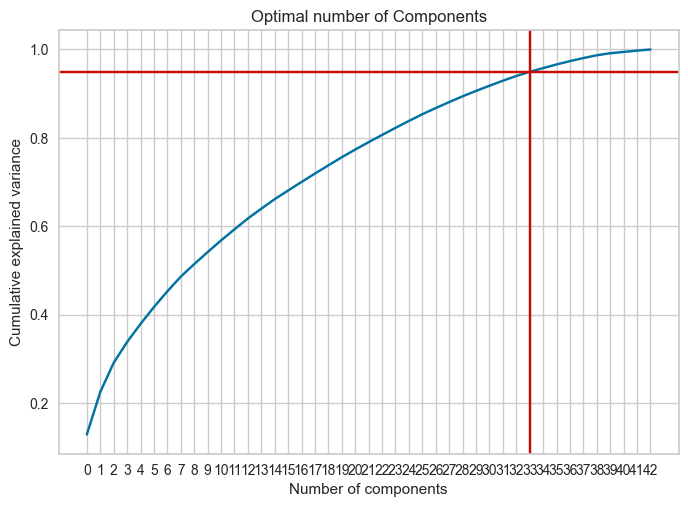

In [12]:
plt.plot(cum_explained_ratio)

plt.axhline(y = 0.95, color = 'r', linestyle = '-')
plt.axvline(x = 33, color = 'r', linestyle = '-')
plt.xticks(ticks=np.arange(0, len(cum_explained_ratio), step=1))

plt.title("Optimal number of Components")
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

## Recursive Feature Elimination

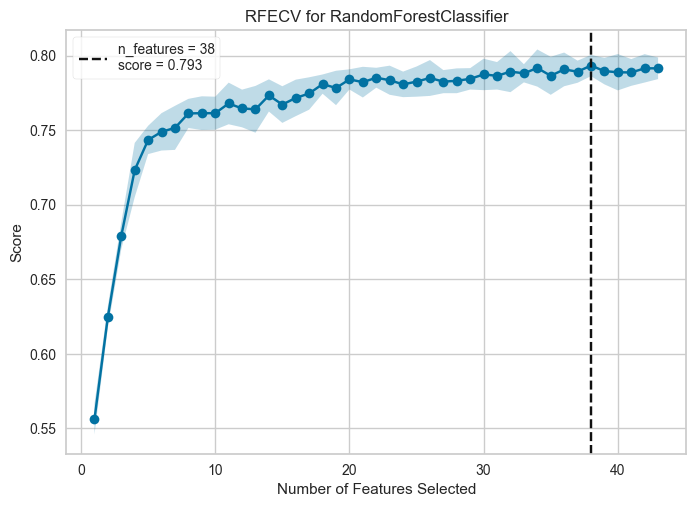

In [13]:
rfecv = rfecv(RandomForestClassifier(random_state=42), X_train_stand, y_train, scoring="f1_weighted")

*workflow from here onwards works with rfecv from sklearn, check that yellowbrick is the same in terms of attributes

In [14]:
from sklearn.feature_selection import RFE
rfe = RFE(RandomForestClassifier(random_state=42), n_features_to_select=7)

In [15]:
rfe.fit(X_train_stand, y_train)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=7)

In [16]:
rfe.support_

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True])

In [17]:
features_train = list(X.columns)
selection_mask = list(rfe.support_)

In [18]:
features_train

['t_syll3',
 'a_char_pw',
 'simp_adj_var',
 'simp_adv_var',
 'simp_intj_var',
 'simp_noun_var',
 'simp_num_var',
 'simp_pron_var',
 'simp_propn_var',
 'simp_sconj_var',
 'simp_sym_var',
 'simp_verb_var',
 'simp_space_var',
 'root_aux_var',
 'root_part_var',
 'root_propn_var',
 'root_space_var',
 'corr_adp_var',
 'corr_cconj_var',
 'corr_det_var',
 'corr_pron_var',
 'corr_punct_var',
 'corr_sconj_var',
 'uber_ttr_no_lem',
 'a_adj_pw',
 'a_adp_pw',
 'a_adv_pw',
 'a_aux_pw',
 'a_cconj_pw',
 'a_det_pw',
 'a_intj_pw',
 'a_noun_pw',
 'a_part_pw',
 'a_punct_pw',
 'a_sconj_pw',
 'a_sym_pw',
 'a_verb_pw',
 'a_space_pw',
 'a_intj_ps',
 'a_num_ps',
 'a_pron_ps',
 'a_propn_ps',
 'smog']

In [19]:
len(features_train)

43

In [20]:
selection_mask.count(False)

36

In [21]:
from itertools import compress

selected_features = list(compress(features_train, selection_mask))

In [22]:
selected_features

['t_syll3',
 'root_propn_var',
 'root_space_var',
 'corr_punct_var',
 'uber_ttr_no_lem',
 'a_propn_ps',
 'smog']

In [23]:
# features

In [24]:
name_selected_features = [feature["name"] for feature in features if feature["key"] in selected_features]
name_selected_features

['total_number_of_words_more_than_three_syllables',
 'root_proper_nouns_variation',
 'root_spaces_variation',
 'corrected_punctuations_variation',
 'uber_type_token_ratio_no_lemma',
 'average_number_of_proper_nouns_per_sentence',
 'smog_index']

## Models

In [25]:
def score_models(X, y, model, selected_features=selected_features, pca=PCA(n_components=33), cv=StratifiedKFold(n_splits=5)):
    
    X_features = X[selected_features]
    
    scores_rfe = cross_validate(model, X_features, y, scoring = ["f1_weighted", "accuracy", "precision", "recall"], cv=cv)
    
    processed_scores_rfe = {f"mean_{key}": np.mean(value) for key, value in scores_rfe.items()}
    processed_scores_rfe["model_name"] = str(model)[:-2]    
    processed_scores_rfe["method"] = "rfe"

    return processed_scores_rfe

In [26]:
models = [RandomForestClassifier(random_state=42), GradientBoostingClassifier(random_state=42), AdaBoostClassifier(random_state=42)]
scores = []

for model in models:
    processed_scores_rfe = score_models(X, y, model)
    scores.append(processed_scores_rfe)

c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\alber\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is 

In [27]:
scores

[{'mean_fit_time': 0.7130056381225586,
  'mean_score_time': 0.024013042449951172,
  'mean_test_f1_weighted': 0.7619450951693347,
  'mean_test_accuracy': 0.7619573796369377,
  'mean_test_precision': 0.760103320556673,
  'mean_test_recall': 0.7663146128815918,
  'model_name': 'RandomForestClassifier(random_state=4',
  'method': 'rfe'},
 {'mean_fit_time': 0.6431200981140137,
  'mean_score_time': 0.007470607757568359,
  'mean_test_f1_weighted': 0.751868661310545,
  'mean_test_accuracy': 0.7521704814522494,
  'mean_test_precision': 0.737075418989049,
  'mean_test_recall': 0.7852385801932488,
  'model_name': 'GradientBoostingClassifier(random_state=4',
  'method': 'rfe'},
 {'mean_fit_time': 0.19782328605651855,
  'mean_score_time': 0.012531852722167969,
  'mean_test_f1_weighted': 0.7266050900284909,
  'mean_test_accuracy': 0.72707182320442,
  'mean_test_precision': 0.7109686291728853,
  'mean_test_recall': 0.7666340445614644,
  'model_name': 'AdaBoostClassifier(random_state=4',
  'method': '

## Results

In [28]:
results_df = pd.DataFrame(scores)

In [29]:
results_df

,mean_fit_time,mean_score_time,mean_test_f1_weighted,mean_test_accuracy,mean_test_precision,mean_test_recall,model_name,method
0,0.713006,0.024013,0.761945,0.761957,0.760103,0.766315,RandomForestClassifier(random_state=4,rfe
1,0.643120,0.007471,0.751869,0.752170,0.737075,0.785239,GradientBoostingClassifier(random_state=4,rfe
2,0.197823,0.012532,0.726605,0.727072,0.710969,0.766634,AdaBoostClassifier(random_state=4,rfe


go ahead with random forest and the rfe 7 features

## GRIDSEARCH

In [30]:
param_grid = { 
    'n_estimators': [50, 100, 200, 300], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [2, 4, 8, None],
    "min_samples_split": [2, 5, 10],
    'max_leaf_nodes': [4, 8, None]
    }

In [31]:
from itertools import product

hyperparams, values = zip(*param_grid.items())
number_combinations = [dict(zip(hyperparams, v)) for v in product(*values)]

print(len(number_combinations))
print(number_combinations)

432
[{'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 2, 'min_samples_split': 2, 'max_leaf_nodes': 4}, {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 2, 'min_samples_split': 2, 'max_leaf_nodes': 8}, {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 2, 'min_samples_split': 2, 'max_leaf_nodes': None}, {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 2, 'min_samples_split': 5, 'max_leaf_nodes': 4}, {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 2, 'min_samples_split': 5, 'max_leaf_nodes': 8}, {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 2, 'min_samples_split': 5, 'max_leaf_nodes': None}, {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 2, 'min_samples_split': 10, 'max_leaf_nodes': 4}, {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 2, 'min_samples_split': 10, 'max_leaf_nodes': 8}, {'n_estimators': 50, 'max_features': 'sqrt', 'max_depth': 2, 'min_samples_split': 10, 'max_leaf_nodes': None}, {'n_estimators': 50,

In [32]:
from sklearn.model_selection import GridSearchCV

gridsearch = GridSearchCV(RandomForestClassifier(random_state=42), param_grid,  scoring="f1_weighted", refit=True, cv=StratifiedKFold(n_splits=5), verbose=3)

In [33]:
gridsearch.fit(X_train_stand, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV 1/5] END max_depth=2, max_features=sqrt, max_leaf_nodes=4, min_samples_split=2, n_estimators=50;, score=0.698 total time=   0.0s
[CV 2/5] END max_depth=2, max_features=sqrt, max_leaf_nodes=4, min_samples_split=2, n_estimators=50;, score=0.683 total time=   0.0s
[CV 3/5] END max_depth=2, max_features=sqrt, max_leaf_nodes=4, min_samples_split=2, n_estimators=50;, score=0.697 total time=   0.0s
[CV 4/5] END max_depth=2, max_features=sqrt, max_leaf_nodes=4, min_samples_split=2, n_estimators=50;, score=0.726 total time=   0.0s
[CV 5/5] END max_depth=2, max_features=sqrt, max_leaf_nodes=4, min_samples_split=2, n_estimators=50;, score=0.709 total time=   0.0s
[CV 1/5] END max_depth=2, max_features=sqrt, max_leaf_nodes=4, min_samples_split=2, n_estimators=100;, score=0.689 total time=   0.1s
[CV 2/5] END max_depth=2, max_features=sqrt, max_leaf_nodes=4, min_samples_split=2, n_estimators=100;, score=0.698 total time=   0.1s
[CV

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 8, None],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [4, 8, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='f1_weighted', verbose=3)

In [34]:
gridsearch_results  = gridsearch.cv_results_
gridsearch_results_df = pd.DataFrame(gridsearch_results)

In [35]:
gridsearch_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_features', 'param_max_leaf_nodes',
       'param_min_samples_split', 'param_n_estimators', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [57]:
gridsearch_results_df.to_csv("gridsearch_results_11-08.csv", index=False)

In [56]:
import pandas as pd

gridsearch_results_df = pd.read_csv("gridsearch_results_11-08.csv")

In [38]:
gridsearch_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_features', 'param_max_leaf_nodes',
       'param_min_samples_split', 'param_n_estimators', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [39]:
# cols = ['mean_fit_time', 'std_fit_time', 'mean_score_time',
#        'std_score_time', 'param_max_depth', 'param_max_features',
#        'param_max_leaf_nodes', 'param_min_samples_split', 'param_n_estimators',
#        'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
#        'mean_test_score', 'std_test_score', 'rank_test_score']

In [40]:
gridsearch_results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.111430,0.001774,0.004443,0.000782,2.0,sqrt,4.0,2,50,"{'max_depth': 2, 'max_features': 'sqrt', 'max_...",0.698117,0.683344,0.696668,0.726489,0.708530,0.702630,0.014366,325
1,0.217166,0.000891,0.005944,0.000514,2.0,sqrt,4.0,2,100,"{'max_depth': 2, 'max_features': 'sqrt', 'max_...",0.689242,0.698182,0.710549,0.718950,0.707574,0.704900,0.010264,298
2,0.431272,0.001773,0.010453,0.000526,2.0,sqrt,4.0,2,200,"{'max_depth': 2, 'max_features': 'sqrt', 'max_...",0.694322,0.701242,0.707675,0.714547,0.711393,0.705836,0.007264,262
3,0.644327,0.004354,0.015085,0.001470,2.0,sqrt,4.0,2,300,"{'max_depth': 2, 'max_features': 'sqrt', 'max_...",0.690730,0.696615,0.710600,0.711777,0.710528,0.704050,0.008687,307
4,0.110886,0.001870,0.004247,0.000309,2.0,sqrt,4.0,5,50,"{'max_depth': 2, 'max_features': 'sqrt', 'max_...",0.698117,0.683344,0.696668,0.726489,0.708530,0.702630,0.014366,325


In [41]:
gridsearch_results_df.sort_values(by='mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
388,0.420486,0.002820,0.007999,5.309834e-07,NaN,log2,NaN,5,50,"{'max_depth': None, 'max_features': 'log2', 'm...",0.799417,0.788273,0.801141,0.806871,0.780616,0.795264,0.009486,1
350,1.974800,0.013198,0.027805,7.514657e-04,NaN,sqrt,NaN,2,200,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.792012,0.787317,0.791064,0.814300,0.789009,0.794740,0.009915,2
354,1.966522,0.048353,0.026259,5.442616e-04,NaN,sqrt,NaN,5,200,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.796656,0.789161,0.782692,0.809651,0.793588,0.794349,0.008976,3
351,3.015305,0.027445,0.041436,2.420361e-03,NaN,sqrt,NaN,2,300,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.795720,0.786416,0.790146,0.811514,0.787052,0.794170,0.009276,4
391,2.492703,0.011408,0.038704,3.986248e-04,NaN,log2,NaN,5,300,"{'max_depth': None, 'max_features': 'log2', 'm...",0.795729,0.791967,0.791064,0.804086,0.787140,0.793997,0.005736,5


Evaluation of individual hyperparameters

In [42]:
gridsearch_results_df.pivot_table("mean_test_score", "param_max_features")

,mean_test_score
param_max_features,
log2,0.724823
sqrt,0.726697


In [43]:
gridsearch_results_df.pivot_table("mean_test_score", "param_max_depth")

,mean_test_score
param_max_depth,
2.0,0.700604
4.0,0.719996
8.0,0.730876


In [44]:
gridsearch_results_df.pivot_table("mean_test_score", "param_max_leaf_nodes")

,mean_test_score
param_max_leaf_nodes,
4.0,0.702474
8.0,0.719313


In [45]:
gridsearch_results_df.pivot_table("mean_test_score", "param_min_samples_split")

,mean_test_score
param_min_samples_split,
2,0.722591
5,0.722715
10,0.722527


In [46]:
gridsearch_results_df.pivot_table("mean_test_score", "param_n_estimators")

,mean_test_score
param_n_estimators,
50,0.721619
100,0.722795
200,0.722973
300,0.723056


In [47]:
gridsearch_results_df.pivot_table("mean_test_score", ["param_max_depth", "param_max_leaf_nodes"])

mean_test_score
param_max_depth param_max_leaf_nodes                 
2.0             4.0                          0.700604
                8.0                          0.700604
4.0             4.0                          0.703098
                8.0                          0.725194
8.0             4.0                          0.703098
                8.0                          0.725727

Filtering down parameters


In [48]:
threshold = 0.79
models_over_threshold = gridsearch_results_df[gridsearch_results_df["mean_test_score"] > threshold]
len(models_over_threshold)

15

In [49]:
models_over_threshold.pivot_table("mean_test_score", "param_n_estimators")

,mean_test_score
param_n_estimators,
50,0.795264
100,0.792125
200,0.792540
300,0.792803


In [60]:
models_over_threshold[["param_n_estimators", "mean_test_score", "rank_test_score"]].sort_values(by="mean_test_score", ascending=False)

,param_n_estimators,mean_test_score,rank_test_score
388,50,0.795264,1
350,200,0.794740,2
354,200,0.794349,3
351,300,0.794170,4
391,300,0.793997,5
355,300,0.793039,6
353,100,0.792853,7
387,300,0.792695,8
359,300,0.792665,9
389,100,0.791955,10


In [61]:
final_candidate = models_over_threshold[models_over_threshold["rank_test_score"] == 1]
hyperparams = final_candidate[["params"]].iloc[0]
param_dict = hyperparams[0]

C:\Users\alber\AppData\Local\Temp\ipykernel_21144\4164756508.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  param_dict = hyperparams[0]


In [62]:
print(param_dict)
print(type(param_dict))

{'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_samples_split': 5, 'n_estimators': 50}
<class 'str'>


In [63]:
from ast import literal_eval

param_dict = literal_eval(param_dict)
print(param_dict)
print(type(param_dict))

{'max_depth': None, 'max_features': 'log2', 'max_leaf_nodes': None, 'min_samples_split': 5, 'n_estimators': 50}
<class 'dict'>


## FINAL MODEL

check out https://scikit-learn.org/stable/common_pitfalls.html

nota: antes de hacer todo lo de pca y rfe tengo que splittear en test/train para evitar data leakage

se splitea en train/test ANTES DE LA PIPELINE

LA PIPELINE COGE SOLO TRAIN PARA SPLITTEAR

HAVE A LOOK AT THE RANDOM STATE THING

In [54]:
# after splitting the train/test, save the scaler or just do a pipeline
# can access this way: 
# # For example, get the first step of the pipeline steps[0]
# then get the actual scaler object [1]
# clf.steps[0][1].scale_

## PIPELINE

in: pieza de texto
1. lftk para conseguir los features de rfe - funcion para crear X
2. standard -  can save the scaler or manually set the mean/std
3. predict - load model and .predict

poner los imports dentro de la funcion o fuera? fuera i think right

In [110]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

X = X[selected_features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=42)
# meter el para grim que elija al final

steps = [("scaler", StandardScaler()), 
        ("model", RandomForestClassifier(random_state=42, 
                                        max_depth=None, 
                                        max_features= 'log2', 
                                        max_leaf_nodes= None, 
                                        min_samples_split= 5, 
                                        n_estimators= 50 ))
        ]
pipeline = Pipeline(steps=steps)

pipeline.fit(X_train, y_train)

# save pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(max_features='log2',
                                        min_samples_split=5, n_estimators=50,
                                        random_state=42))])

In [111]:
import pickle

with open('pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

In [112]:
# evaluate the pipeline but if we already have the cv evaluation and the train-test splits are the same, 
# then I can just skip the eval right? DOUBLE CHECK

## Workflow to get predictions

In [113]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [114]:
def extract_linguistic_features(text):
    
    doc = nlp(text)
    
    features = ['t_syll3', 'root_propn_var', 'root_space_var', 'corr_punct_var', 'uber_ttr_no_lem', 'a_propn_ps', 'smog']
    LFTK = lftk.Extractor(docs = doc)
    LFTK.customize(stop_words = True, round_decimal = 2)
    doc_features = LFTK.extract(features=features)
    
    X = pd.DataFrame([doc_features])
    
    return X

In [123]:
def predict_text(text, pipeline_path):
    
    # text_utf8 = text.encode("utf-8")
    
    with open(pipeline_path, 'rb') as f:
        pipeline = pickle.load(f)
    
    X_transformed = extract_linguistic_features(text)
    prediction_array = pipeline.predict(X_transformed)
    predition = prediction_array[0]
    
    result_dict_translation = {0:"Fake", 1:"True"}
    
    return result_dict_translation[predition]

In [ ]:
# example of predicting text

In [124]:
predict_text("A law enforcement sniper assigned to former President Donald Trump's rally Saturday in Butler, Pennsylvania, says the head of the Secret Service ordered him not to shoot the suspect accused of attempting to assassinate Trump.", r"C:\Users\alber\Desktop\Git Projects\Make_Believe_v2\pipeline.pkl")

'Fake'

## Get SHAP explanation

In [ ]:
# make a json dict to translate features to the names and save the feature list form the keys of said dictionary

feature_names = ['total_number_of_words_more_than_three_syllables', 'root_proper_nouns_variation', 'root_spaces_variation', 'corrected_punctuations_variation', 'uber_type_token_ratio_no_lemma', 'average_number_of_proper_nouns_per_sentence', 'smog_index']



https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137